# Mooring Synthesis of Initial NC data (offline)

## 24BS-2A

- from netcdf files
- plot all depths of each parameter on each other for comparative purposes
- Temperature, Salinity, Pressure in this notebook.  See companion for Oxygen, Chlor, ADCP/currents, etc

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import datetime
import cmocean

In [43]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


<Figure size 640x480 with 0 Axes>

In [44]:
path = '/Users/bell/ecoraid/2023/Moorings/23bs2c/final_data_cf/'
ncfiles = ['23bs2c_an9_0014m.nc','23bs2c_s16_0022m.nc']
path_2 = '/Users/bell/ecoraid/2024/Moorings/24bspr2a/final_data_cf/'
ncfiles_2 = ['24bspr2a_rcmsg_0052m.nc','24bspr2a_s16_0001m.nc']

mfd = xa.open_mfdataset([path+x for x in ncfiles], chunks=None)
mfd_2 = xa.open_mfdataset([path_2+x for x in ncfiles_2], chunks=None)

In [86]:
temp["time"]

<xarray.DataArray 'time' (time: 9042)>
array(['2023-08-29T00:00:00.000000000', '2023-08-29T01:00:00.000000000',
       '2023-08-29T02:00:00.000000000', ..., '2024-09-08T15:00:00.000000000',
       '2024-09-08T16:00:00.000000000', '2024-09-08T17:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    latitude   float64 56.86
    longitude  float64 -164.1
    depth      float64 14.0
  * time       (time) datetime64[ns] 2023-08-29 ... 2024-09-08T17:00:00

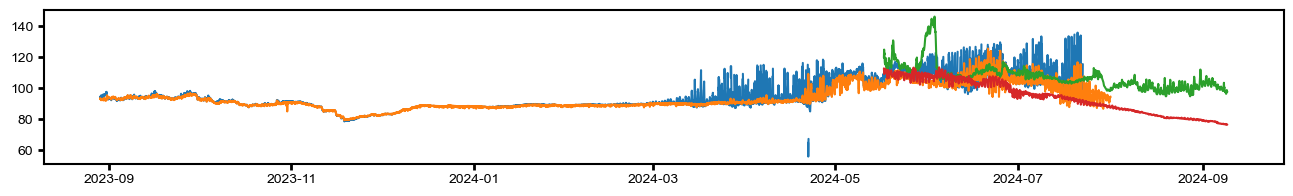

In [88]:
fig, ax = plt.subplots(1,figsize=(16, 2))
temp = mfd.isel({'latitude':0,'longitude':0}).resample({'time':'1h'}).mean()
for depth in temp.depth:
    ax.plot(temp.sel({"depth":depth})["time"],temp.sel({"depth":depth})["oxy_percentsat"])

temp = mfd_2.isel({'latitude':0,'longitude':0}).resample({'time':'1h'}).mean()
for depth in mfd_2.depth:
    ax.plot(temp.sel({"depth":depth})["time"],temp.sel({"depth":depth})["oxy_percentsat"])


(72.0, -5.0)

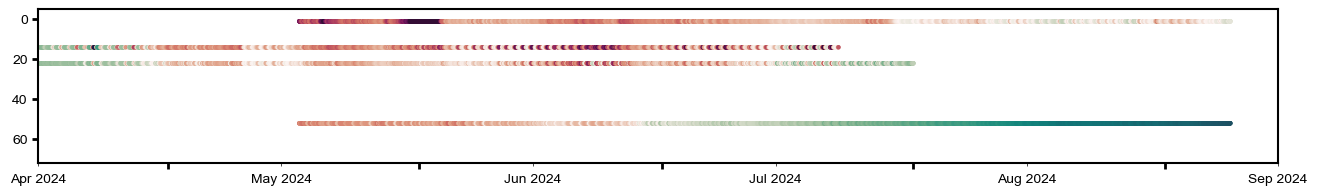

In [54]:
fig, ax = plt.subplots(1,figsize=(16, 2))
for depth in mfd.isel({'latitude':0,'longitude':0}).depth:
    temp = mfd.isel({'latitude':0,'longitude':0}).sel({'depth':depth})
    ax.scatter(temp["time"],
               np.ones_like(temp["oxy_percentsat"].values)*temp["depth"].values,
               c=temp["oxy_percentsat"],cmap=cmocean.cm.curl,s=5,vmin=70,vmax=130)

for depth in mfd_2.isel({'latitude':0,'longitude':0}).depth:
    temp = mfd_2.isel({'latitude':0,'longitude':0}).sel({'depth':depth})
    ax.scatter(temp["time"],
               np.ones_like(temp["oxy_percentsat"].values)*temp["depth"].values,
               c=temp["oxy_percentsat"],cmap=cmocean.cm.curl,s=5,vmin=70,vmax=130)

# ax.set_ylim([50,0])
ax.set_xlim([datetime.date(2024,4,15),datetime.date(2024,9,15)])

ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)
# ax.invert_yaxis()
ax.set_ylim([72,-5])

##Prawler

In [7]:
prawler = pd.read_csv('/Users/bell/ecoraid/2024/Moorings/24bspr2a/rawconverted/praw/24BSPR-2A_preliminary_Prawler.csv',parse_dates=True,index_col='time (UTC)')

(72.0, -5.0)

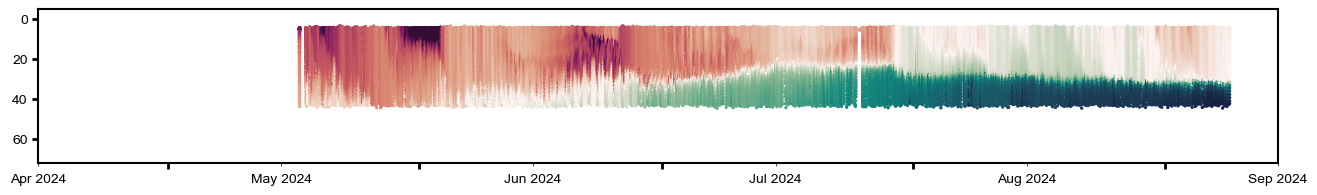

In [8]:
upper_temp = 130
lower_temp = 70

fig, ax = plt.subplots(1,figsize=(16, 2))
# mfd.chlor_fluorescence.T.plot(ax=ax,vmin=lower_temp,vmax=upper_temp,cmap=cmocean.cm.algae)

ax.scatter(prawler.index,prawler['SB_Depth'],c=prawler['O2PercentSat'],
           s=2,cmap=cmocean.cm.curl,vmin=lower_temp,vmax=upper_temp)
            
ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

ax.set_xlim([datetime.date(2024,4,15),datetime.date(2024,9,15)])
ax.set_ylim([72,-5])

In [9]:
import plotly.express as px

In [ ]:
for depth in mfd.isel({'latitude':0,'longitude':0}).depth:
    mfd.isel({'latitude':0,'longitude':0}).sel({'depth':depth}).oxy_percentsat.plot(x="time",hue="depth",ax=ax,linewidth=.5)

for depth in mfd_2.isel({'latitude':0,'longitude':0}).depth:
    mfd_2.isel({'latitude':0,'longitude':0}).sel({'depth':depth}).oxy_percentsat.plot(x="time",hue="depth",ax=ax,linewidth=.5)

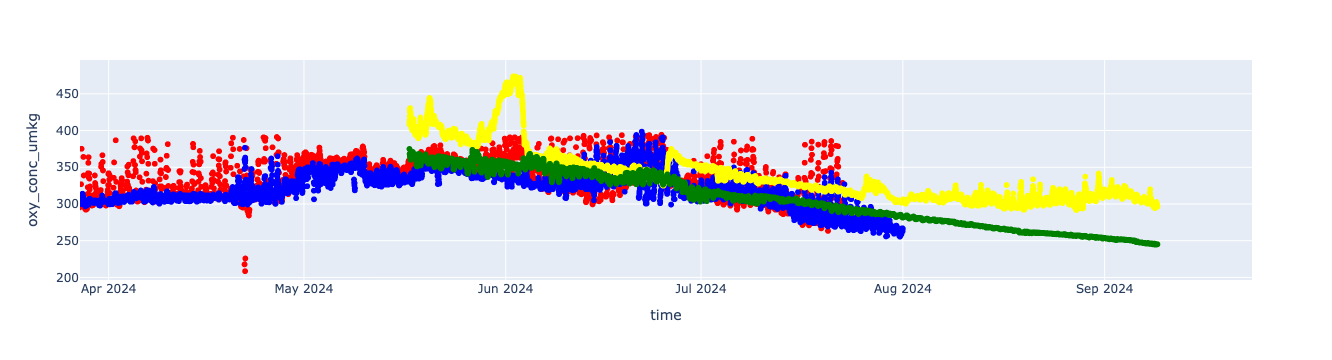

In [46]:
fig = px.scatter(mfd.isel({'latitude':0,'longitude':0}).isel({'depth':0}).to_dataframe(),y='oxy_conc_umkg', color_discrete_sequence=['red'])
fig2 = px.scatter(mfd.isel({'latitude':0,'longitude':0}).isel({'depth':1}).to_dataframe(),y='oxy_conc_umkg', color_discrete_sequence=['blue'])
fig3 = px.scatter(mfd_2.isel({'latitude':0,'longitude':0}).isel({'depth':0}).to_dataframe(),y='oxy_conc_umkg_ctdcor', color_discrete_sequence=['yellow'])
fig4 = px.scatter(mfd_2.isel({'latitude':0,'longitude':0}).isel({'depth':1}).to_dataframe(),y='oxy_conc_umkg_ctdcor', color_discrete_sequence=['green'])
fig.add_trace(fig2.data[0])
fig.add_trace(fig3.data[0])
fig.add_trace(fig4.data[0])

fig.show()